# Regression

Different examples are provided for linear regression models. The idea is to predict the Sales in base of the information about the country, price, month and year and some other variables. 

Dataset: https://www.kaggle.com/wkirgsn/electric-motor-temperature. The objective is to predict the motor_speed in function of the other variables.
 
Load the dataset. 

In [1]:
import pandas as pd
df = pd.read_csv("data/pmsm_temperature_data.csv")
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

Check if the data has NAs values.

In [2]:
df.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

Split the dataframe into X - predictors and y - target

In [3]:
from sklearn import linear_model
X = df.drop(["motor_speed"], axis=1)
y = df["motor_speed"]

Show the columns' names of the predictors

In [4]:
 X.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d', 'i_q', 'pm',
       'stator_yoke', 'stator_tooth', 'stator_winding', 'profile_id'],
      dtype='object')

Split dataset into test/train using model_selection from sklearn. 

In [5]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

## Linear Regression

Fit the model with the training set and calculate the predictions for the test set. 

In [6]:
import math
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print('R2-squared:', lm.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))

R2-squared: 0.9278644469897314
mean squared error: 0.0723917963999066
root squared mean squared error: 0.2690572362898025


1. Show the intercept
2. Show the coefficients
3. Graph the feature importance of the variables into a bar plot

In [7]:
#show the intercept
print(model.intercept_)

#show the coefficients
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
plt.show()

0.011740502983667621
[-4.89154009e-02  4.11265902e-01 -1.64767457e-01  5.38812224e-01
 -3.38560267e-01 -6.57712038e-01  1.32918836e-01  1.05157467e-01
 -1.62717688e+00  2.31779079e+00 -1.16784503e+00 -2.17762915e-04]
                Coefficient
ambient           -0.048915
coolant            0.411266
u_d               -0.164767
u_q                0.538812
torque            -0.338560
i_d               -0.657712
i_q                0.132919
pm                 0.105157
stator_yoke       -1.627177
stator_tooth       2.317791
stator_winding    -1.167845
profile_id        -0.000218


<Figure size 800x1000 with 1 Axes>

Plot actual vs predicted values

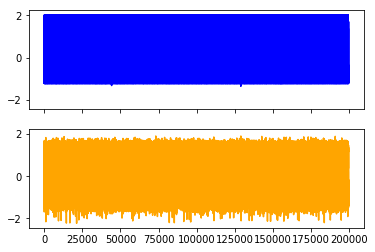

In [8]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()

In [9]:
X = df.drop(["motor_speed","profile_id"], axis=1)
y = df["motor_speed"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print('R2-squared:', lm.score(X_test,y_test))
print('mean squared error:', mean_squared_error(y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test, predictions)))

R2-squared: 0.9278509177821468
mean squared error: 0.07240537366659477
root squared mean squared error: 0.26908246629350413


## Ridge reggression

Use the same training and test sets to fit the data to Ridge regression model. Plot the actual vs predicted values. 

0.9278509166918794


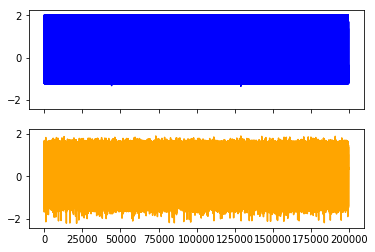

In [10]:
#example with 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
print(rr.score(X_test, y_test))
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()

## Random Forest

In order to improve the performance of the model, we can use an ensemble. We are going to use a Random Forest, which is a combination of trees. 

You can use the RandomForestRegressor model from sklearn.ensemble

Score: 0.99995688401257


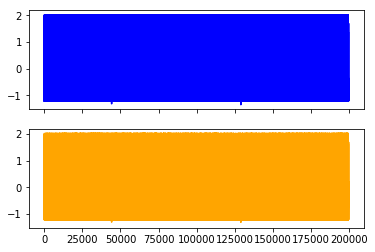

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 123)
rf_model = rf_model.fit(X_test, y_test)
predictions = rf_model.predict(X_test)
print('Score:',rf_model.score(X_test,y_test))
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(y_test.to_numpy(), color = 'blue')
ax[1].plot(predictions, color = 'orange')
plt.show()